N.B. This is a notebook I created for my talk at [Hopperx1 London 2019](https://community.anitab.org/event/hopperx1-london/) organised by fabulous people at [AnitaB.org](https://anitab.org/).

It is best viewed as an interactive HTML slide deck using [nbconvert](https://nbconvert.readthedocs.io/en/latest/install.html), as otherwise the styling of most HTML elements will be completely off!

You can visit a [slide deck](https://misaogura.github.io/flashtorch/presentations/Hopperx1London/) hosted on the presentation section on the project GitHub page.

Alternatively, you can use `nbconvert` to serve up locally. Here's how to do it.

From your terminal, run:

```
$ jupyter nbconvert presentation/hopperx1.ipynb --to slides --post serve
```

It should open up a browser automatically.

Modify the path to this notebook depending on where you're lauching it from.

<head>
    <link rel="stylesheet" href="https://use.fontawesome.com/releases/v5.8.2/css/all.css" integrity="sha384-oS3vJWv+0UjzBfQzYUhtDYW+Pj2yciDJxpsK1OYPAYjqT085Qq/1cq5FLXAZQ7Ay" crossorigin="anonymous">
<head>

<div class='title'>
    <h1 id='main-title'>Seeing is believing</h1>
    <h3 id='subtitle'>Using FlashTorch 🔦 to shine a light on what neural nets "see"</h3>
    <a href='https://github.com/MisaOgura/flashtorch' target='_blank'><i id='repo' class="fas fa-code-branch"></i></a>
    <hr>
    <p>by Misa Ogura</p>
    <p id='short-url'>Follow along @ <b>https://bit.ly/2WzVzgu</b></p>
</div>

<h2>Hello, I'm Misa 👋</h2>

<hr>

<div class='profile-container'>
    <img id='profile-image' src='images/misa_ogura_profile.jpg' width='200' height='200'>
    <ul id='profile-list'>
        <li>Originally from Tokyo, now based in London</li>
        <li>Cancer Cell Biologist, turned Software Engineer</li>
        <li>Currently at BBC R&D</li>
        <li>Co-founder of Women Driven Development</li>
        <li>Women in Data Science London Ambassador</li>
    </ul>
</div>


<div class='social-container'>
    <a href='https://github.com/misaogura' target='_blank'><i class="fab fa-github"></i></a>
    <a href='https://medium.com/@misaogura' target='_blank'><i class="fab fa-medium-m"></i></a>
    <a href='https://www.linkedin.com/in/misaogura/' target='_blank'><i class="fab fa-linkedin-in"></i></a>
    <a href='https://twitter.com/misa_ogura' target='_blank'><i class="fab fa-twitter"></i></a>
    <a href='https://womendrivendev.org' target='_blank'>
        <img id='wdd-logo' src='images/wdd-logo.png' width='20' height='20'>
    </a>
</div>

## Feature visualisation

---

- Aims to understand how neural networks _perceive_ images

- Evolved in response to a desire to make neural nets <a href='https://christophm.github.io/interpretable-ml-book/interpretability.html' target='_blank'>more interpretable</a>

- For latest developments: <a href='https://distill.pub/2017/feature-visualization/' target='_blank'>brilliant</a> <a href='https://distill.pub/2018/building-blocks/' target='_blank'>series</a> of <a href='https://distill.pub/2019/activation-atlas/' target='_blank'>articles</a> on Distill

## Introducing FlashTorch 🔦

---

- <a href='https://github.com/MisaOgura/flashtorch' target='_blank'>Open source</a> feature visualisation toolkit for neural nets in PyTorch

- Supports <a href='https://pytorch.org/docs/stable/torchvision/models.html' target='_blank'>torchvision models</a>

- Available to install via pip!

    ```
    $ pip install flashtorch
    ```

## Image processing & CNNs 101

---

### Kernel & convolution

---

<b>Kernel</b>: a small matrix used for edge detection, blurring, sharpening, embossing, etc.

<b>Convolution</b>: an operation to calculate weighted sum of neibouring pixels

<div class='convolution'>
    <img src='images/convolution_1.png' width='250'>
    <img src='images/convolution_2.png' width='250'>
    <img src='images/convolution_3.png' width='250'>
</div>

<div class='source'>
    <a target='_blank' href='https://github.com/vdumoulin/conv_arithmetic'>Source</a>
</div>

### Examples of convolution: detecting edges

---

<div>
    <img id='sobel_1' src='images/sobel_1.png' width='600'>
    <img id='sobel_2' src='images/sobel_2.png' width='600'>
</div>

<div class='source'>
    <a target='_blank' href='http://setosa.io/ev/image-kernels/'>Source</a>
</div>

### Typical CNN architecture

---

- Kernels weights are _learnt_ during the training

- Extract features that are relevant to the task at hand

<img id='cnn' src='images/cnn.png' width='800'>

<div class='source'>
    <a target='_blank' href='https://en.wikipedia.org/wiki/Convolutional_neural_network'>Source</a>
</div>

## Feature visualisation technique

### Saliency maps

---

### Saliency

---

- A subjective quality in human visual perception

- Makes certain items _stand out_ and grabs our attention

<b>Saliency maps</b> in computer vision: indications of the most “salient” regions

<div class='saliency'>
    <img src='images/llama_roi.png' width='400'>
    <img src='images/penguin_roi.png' width='400'>
</div>

<div class='source'>
    <a target='_blank' href='https://www.mathworks.com/matlabcentral/fileexchange/43558-roi-selection-for-saliency-maps'>Source</a>
</div>

### Saliency maps in CNNs

---

- First <a target='_blank' href='https://arxiv.org/abs/1312.6034'>introduced</a> in 2013

- _Gradients_ of target class w.r.t. input image via backpropagation

- Pixels with positive gradients: some intuition of _attention_

- Avaialble via `flashtorch.saliency` API 

## FlashTorch demo 1

### Visualising saliency maps with backpropagation

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.models as models

### Install FlashTorch & load an image

---

```

$ pip install flashtorch

...
```

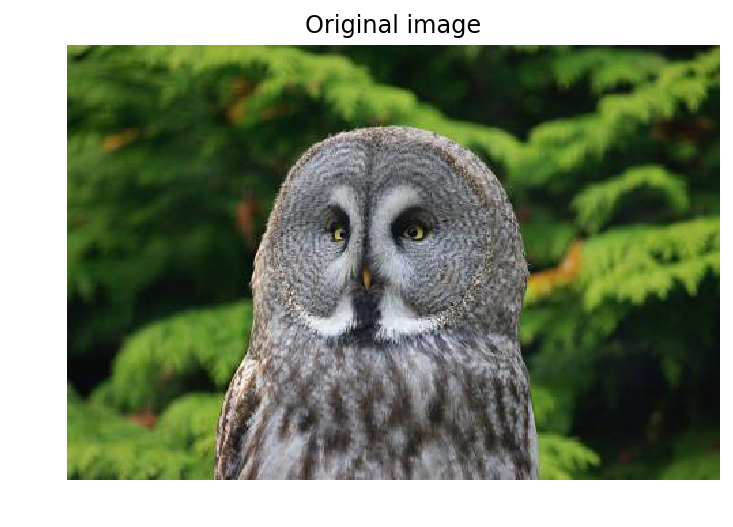

In [2]:
from flashtorch.utils import load_image

image = load_image('../../examples/images/great_grey_owl.jpg')

plt.imshow(image)
plt.title('Original image')
plt.axis('off');

### Apply transformations

---

Before: <class 'PIL.Image.Image'>
After: <class 'torch.Tensor'>, torch.Size([1, 3, 224, 224])


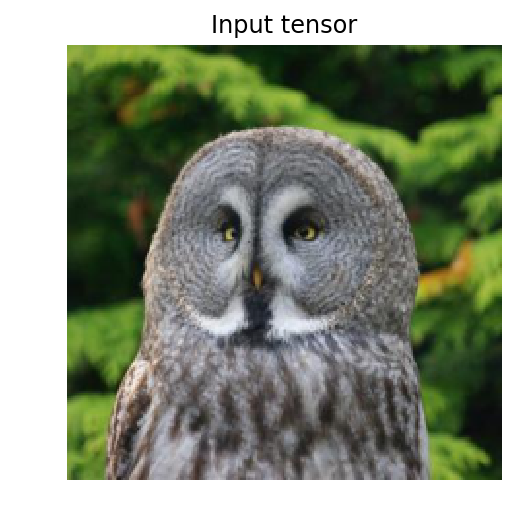

In [3]:
from flashtorch.utils import apply_transforms, denormalize, format_for_plotting

input_ = apply_transforms(image)

print(f'Before: {type(image)}')
print(f'After: {type(input_)}, {input_.shape}')

plt.imshow(format_for_plotting(denormalize(input_)))
plt.title('Input tensor')
plt.axis('off');

### Create a Backprop object with a pre-trained model

---

In [4]:
from flashtorch.saliency import Backprop

model = models.alexnet(pretrained=True)

backprop = Backprop(model)

- Registers **custom functions** to model layers
- Grabs intermidiate gradients _out of the computational graph_

To calculate gradiants:

```
Signature:

    backprop.calculate_gradients(input_, target_class=None, ...)
```

### Calculate the gradients of target class w.r.t. input

---

In [5]:
from flashtorch.utils import ImageNetIndex 

imagenet = ImageNetIndex()
target_class = imagenet['great grey owl']

print(f'Traget class index: {target_class}')

# Ready to calculate gradients!

gradients = backprop.calculate_gradients(input_, target_class)

max_gradients = backprop.calculate_gradients(input_, target_class, take_max=True)

print(type(gradients), gradients.shape)
print(type(max_gradients), max_gradients.shape)

Traget class index: 24
<class 'torch.Tensor'> torch.Size([3, 224, 224])
<class 'torch.Tensor'> torch.Size([1, 224, 224])


### Let's visualise gradients

---

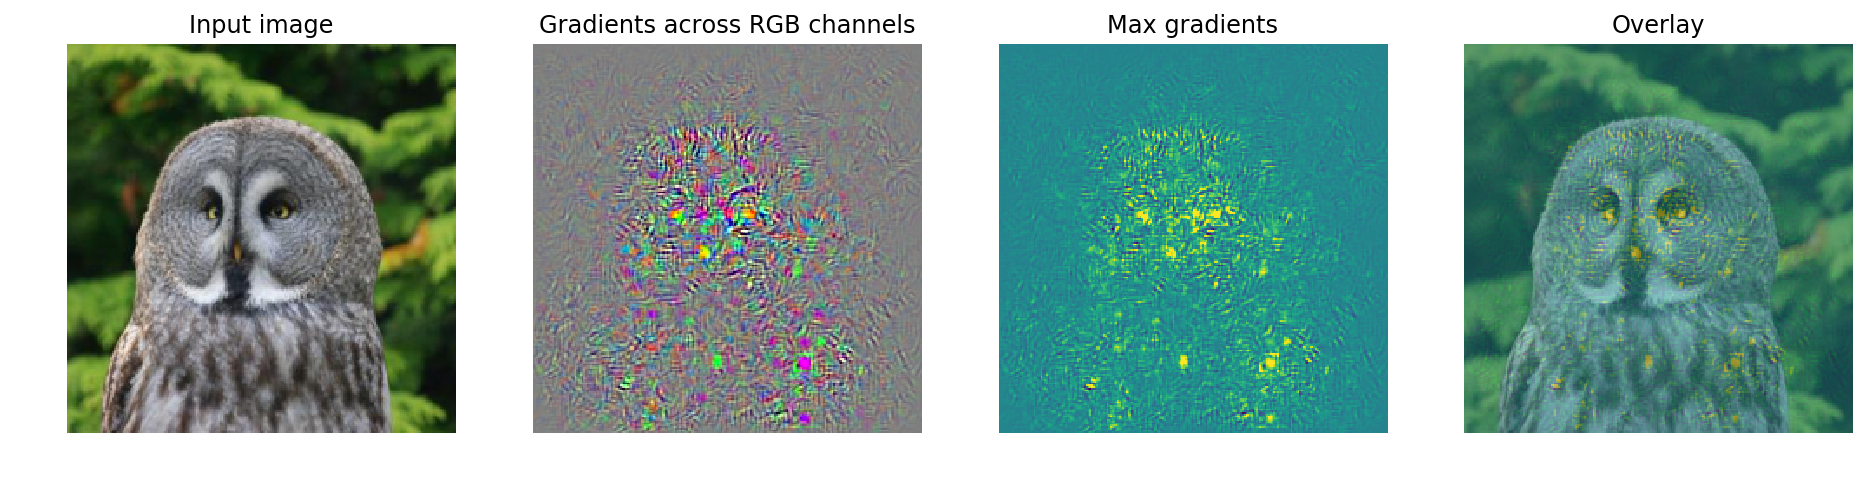

In [6]:
from flashtorch.utils import visualize

visualize(input_, gradients, max_gradients)

<div class='bottom'>
    Pixels where the <b>animal is present</b> have the strongest positive effects.<br/>
    <br/>
    But it's quite noisy...
</div>

## FlashTorch demo 2

### Visualising saliency maps with _guided_ backpropagation

---

### Guided backpropagation

---

- Additional guidance from the higher layers during backprop

- _Masks out_ neurons that had no effect or negative effects on the prediction

- Preventing the flow of such gradients: less noise

<div class='guided_backprop'>
    <img src='images/guided_backprop_1.png' width='200'>
    <img src='images/guided_backprop_2.png' width='200'>
</div>

<div class='source'>
    <a target='_blank' href='https://arxiv.org/abs/1412.6806'>Source</a>
</div>

In [7]:
guided_gradients = backprop.calculate_gradients(input_, target_class, guided=True)

max_guided_gradients = backprop.calculate_gradients(input_, target_class, take_max=True, guided=True)

### Visualise guided gradients

---

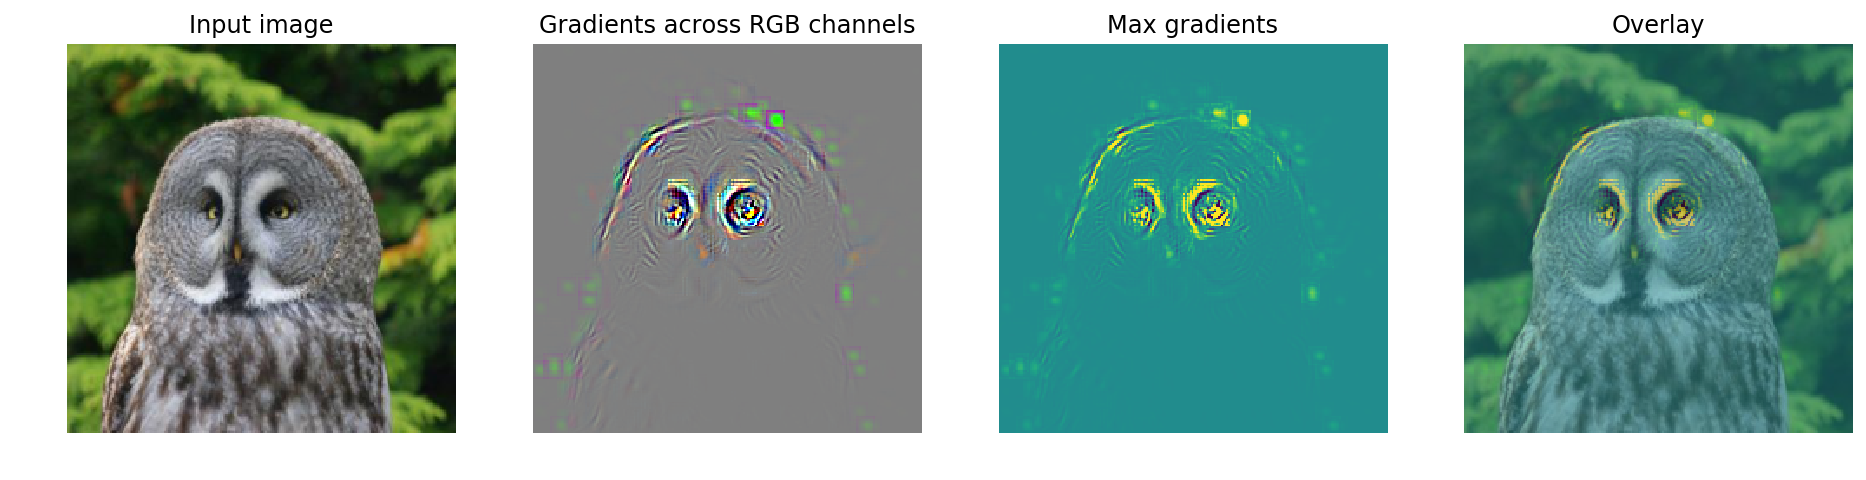

In [8]:
visualize(input_, guided_gradients, max_guided_gradients)

<div class='bottom'>
    Now that's much less noisy!<br/>
    <br/>
    Pixels around the <b>head and eyes</b> have the strongest positive effects.<br/>
    <br/>
    What about other birds?

</div>

### What makes peacock a peacock?

---

In [9]:
input_ = apply_transforms(load_image('../../examples/images/peacock.jpg'))
target_class = imagenet['peacock']

guided_gradients = backprop.calculate_gradients(input_, target_class, guided=True)
max_guided_gradients = backprop.calculate_gradients(input_, target_class, take_max=True, guided=True)

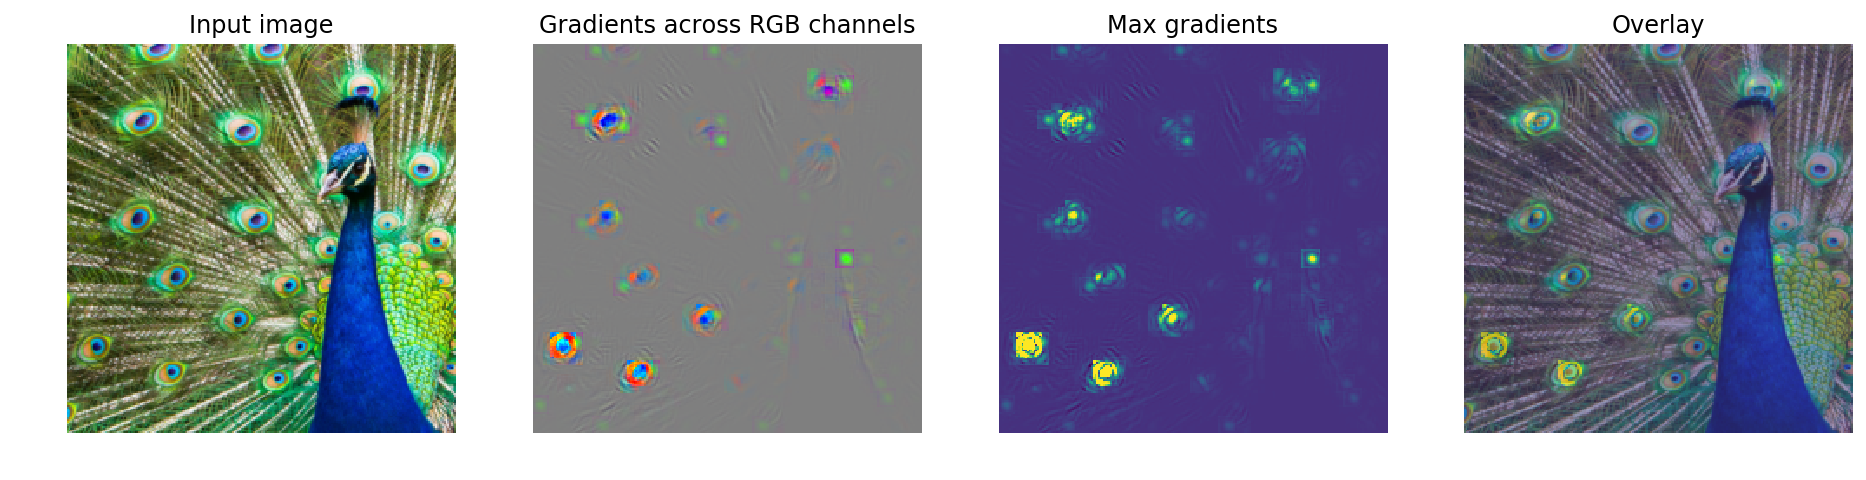

In [10]:
visualize(input_, guided_gradients, max_guided_gradients)

### ... or a tucan?

---

In [11]:
input_ = apply_transforms(load_image('../../examples/images/toucan.jpg'))
target_class = imagenet['toucan']

guided_gradients = backprop.calculate_gradients(input_, target_class, guided=True)
max_guided_gradients = backprop.calculate_gradients(input_, target_class, take_max=True, guided=True)

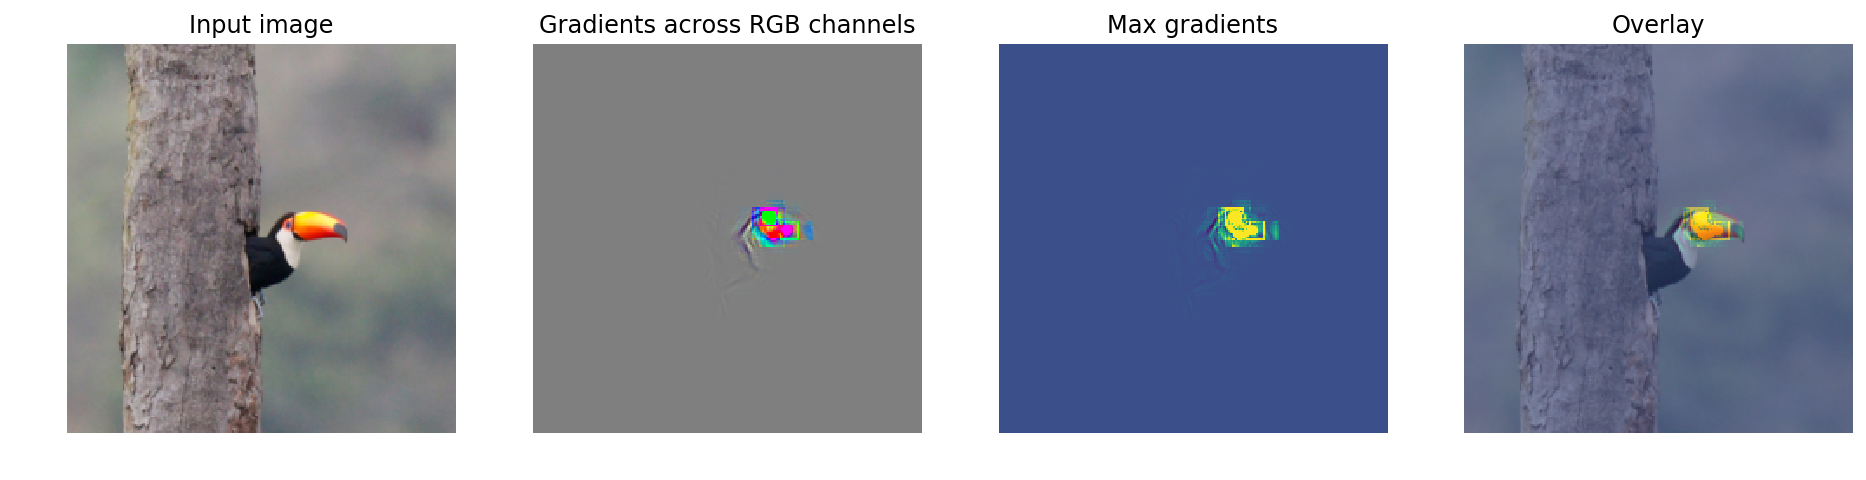

In [12]:
visualize(input_, guided_gradients, max_guided_gradients)

<div class='bottom'>
    Do you agree with the network? 🤖
</div>

## FlashTorch demo 3

### Gaining additional insights on transfer learning

---

### Transfer learning

---

- A model developed for a task is _reused as a starting point_ for another task

- Often used in computer vision & natural language processing tasks

- Save compute & time resources

### Building a flower classifier

---

<b>From</b>: <a href='https://arxiv.org/abs/1608.06993' target='_blank'>Densenet</a> model, pre-trained on <a href='http://www.image-net.org/' target='_blank'>ImageNet</a> (1000 classes)

<b>To</b>: Flower classifier to recognise 102 species of flowers (<a href='http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html' target='_blank'>dataset</a>)

In [13]:
def create_model(filepath=None):
    in_feats = 2208
    out_feats = 102  # Total num of classes

    if filepath is not None:
        model = models.densenet161()
    else:
        model = models.densenet161(pretrained=True)
        
    model.classifier = nn.Sequential(nn.Linear(in_feats, out_feats),
                           nn.LogSoftmax(dim=1))

    if filepath is not None:
        checkpoint = torch.load(filepath, map_location='cpu')
        model.load_state_dict(checkpoint['state_dict'])
        
    for param in model.parameters():
        param.requires_grad = False
    
    return model

### Pre-trained model - 0.1% test accuracy 😨

---

In [14]:
image = load_image('../../examples/images/foxglove.jpg')

input_ = apply_transforms(image)

class_index = 96  # foxglove

pretrained_model = create_model()

trained_model = create_model('../../models/flower_classification_transfer_learning.pt')

/Users/misao/Projects/personal/flashtorch/flashtorch/saliency/backprop.py:94: UserWarning: The predicted class index 93 does notequal the target class index 96. Calculatingthe gradient w.r.t. the predicted class.
  'the gradient w.r.t. the predicted class.'


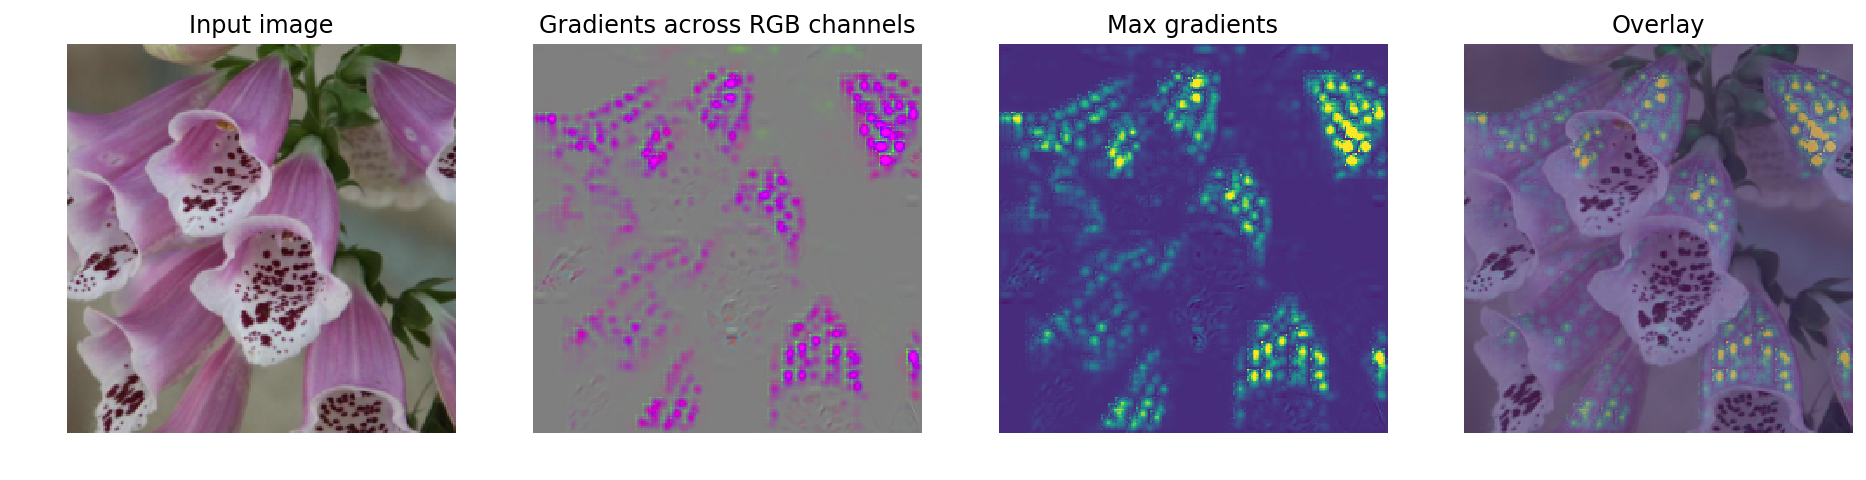

In [15]:
backprop = Backprop(pretrained_model)

guided_gradients = backprop.calculate_gradients(input_, class_index, guided=True)
guided_max_gradients = backprop.calculate_gradients(input_, class_index, take_max=True, guided=True)

visualize(input_, guided_gradients, guided_max_gradients)

<div class='bottom'>
    Trained model achieved <b>98.7% test accuracy</b>.<br/>
    <br/>
    But <i>why</i> is it better now?
</div>

### Trained model - 98.7% test accuracy

---

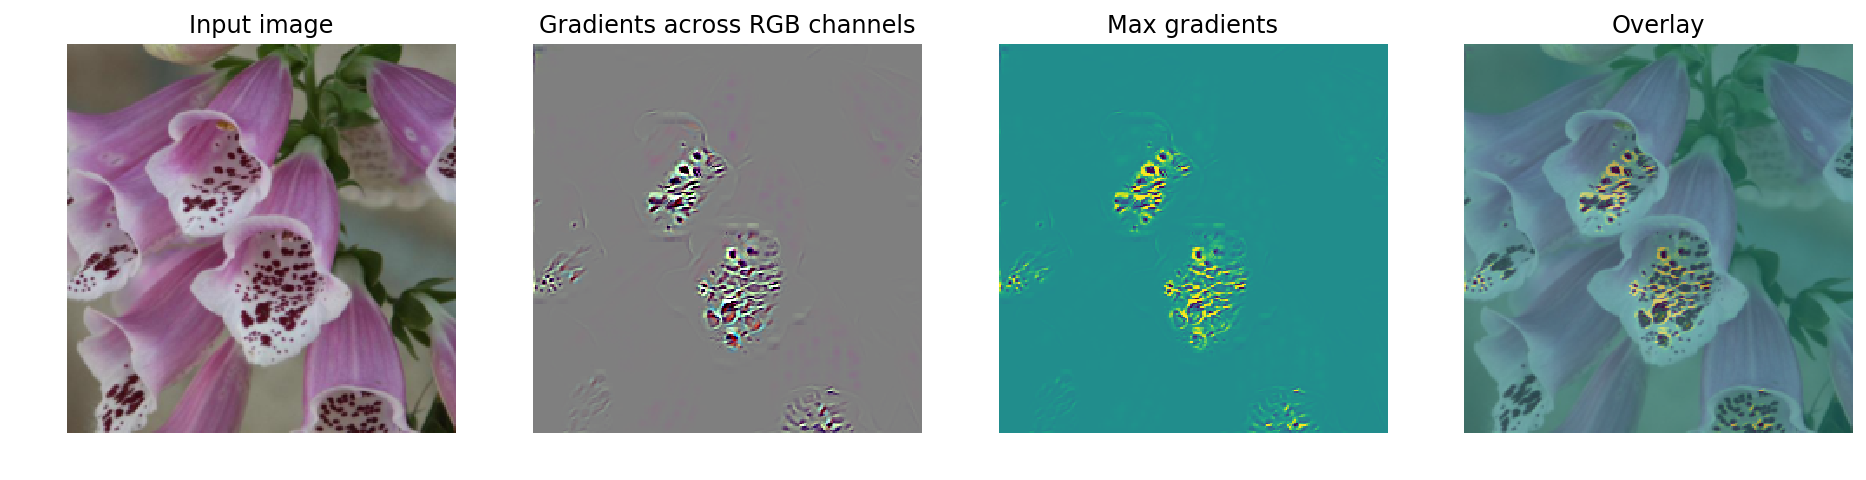

In [16]:
backprop = Backprop(trained_model)

guided_gradients = backprop.calculate_gradients(input_, class_index, guided=True)
guided_max_gradients = backprop.calculate_gradients(input_, class_index, take_max=True, guided=True)

visualize(input_, guided_gradients, guided_max_gradients)

<div class='bottom'>
    The trained model has <i>learnt</i> to shift focus on to the <b>distinguising pattern</b>.    
</div>

## Let's make neural nets more interpretable

---

- Saliency maps as indications of network's _world's view_

- `flashtorch.saliency` module to visualise saliency maps for CNNs in PyTorch

- Asking _why_ the network behaves in the way it does: a step forward from just looking at accuracy

## Thank you!

---

🌡 Like it? Try out FlashTorch 🔦 on <a href='https://colab.research.google.com/github/MisaOgura/flashtorch/blob/master/examples/visualise_saliency_with_backprop_colab.ipynb' target='_blank'>Google Colab</a>

🙏 Comments, questions and feedback on the talk: <a href='https://github.com/MisaOgura/flashtorch/pull/1' target='_blank'>Pull Request</a> 

🤝 General suggestions & contribution: <a href='https://github.com/MisaOgura/flashtorch/issues' target='_blank'>Submit issues</a> 